In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sb
import matplotlib.pyplot as plt
print(pd.__version__)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import os


import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix



pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

2.1.0


***AIRBNB DATASET***

In [2]:
# main dataset
airbnb_listings=pd.read_csv('listings.csv',low_memory=False)

In [3]:
airbnb_listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,92644,https://www.airbnb.com/rooms/92644,20230906022807,2023-09-06,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201,...,4.6700,4.5300,4.6800,NaN,t,1,0,1,0,1.4500
1,93015,https://www.airbnb.com/rooms/93015,20230906022807,2023-09-06,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,...,4.8800,4.8500,4.7400,NaN,f,1,1,0,0,0.2700
2,13913,https://www.airbnb.com/rooms/13913,20230906022807,2023-09-06,city scrape,Rental unit in Islington · ★4.80 · 1 bedroom ·...,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.8200,4.6900,4.6900,NaN,f,2,1,1,0,0.2600
3,15400,https://www.airbnb.com/rooms/15400,20230906022807,2023-09-06,city scrape,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,...,4.8300,4.9300,4.7400,NaN,f,1,1,0,0,0.5600
4,93734,https://www.airbnb.com/rooms/93734,20230906022807,2023-09-07,city scrape,Condo in London · ★4.62 · 1 bedroom · 1 bed · ...,<b>During your stay</b><br />I’m a professiona...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,497514,...,4.8100,4.6400,4.6700,NaN,f,1,0,1,0,1.2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87941,973781286754517228,https://www.airbnb.com/rooms/973781286754517228,20230906022807,2023-09-06,city scrape,Rental unit in Greater London · ★New · 1 bedro...,Enjoy a Experience unique look in the center o...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,498408783,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
87942,973801695874775338,https://www.airbnb.com/rooms/973801695874775338,20230906022807,2023-09-07,city scrape,Rental unit in Greater London · ★New · 1 bedro...,La Casita is a unique one bedroom flat in Sout...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,36645347,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
87943,973811685656289740,https://www.airbnb.com/rooms/973811685656289740,20230906022807,2023-09-06,city scrape,Home in Greater London · ★New · 1 bedroom · 5 ...,NaN,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,340514057,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
87944,973882998775927897,https://www.airbnb.com/rooms/973882998775927897,20230906022807,2023-09-06,city scrape,Home in Greater London · ★New · 5 bedrooms · 5...,<b>The space</b><br />Looking for a spacious h...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,439074505,...,NaN,NaN,NaN,NaN,t,170,170,0,0,NaN


In [4]:
print(f"Data frame is {airbnb_listings.shape[0]:,} x {airbnb_listings.shape[1]}")

Data frame is 87,946 x 75


In [5]:
airbnb_listings.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87946 entries, 0 to 87945
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            87946 non-null  int64  
 1   listing_url                                   87946 non-null  object 
 2   scrape_id                                     87946 non-null  int64  
 3   last_scraped                                  87946 non-null  object 
 4   source                                        87946 non-null  object 
 5   name                                          87946 non-null  object 
 6   description                                   86679 non-null  object 
 7   neighborhood_overview                         47190 non-null  object 
 8   picture_url                                   87943 non-null  object 
 9   host_id                                       87946 non-null 

In [6]:
mem_usage = airbnb_listings.memory_usage(index=True, deep=True)
mem_usage

Index                                                132
id                                                703568
listing_url                                      8644174
scrape_id                                         703568
last_scraped                                     5892382
source                                           6108376
name                                            16469880
description                                     79628510
neighborhood_overview                           30729400
picture_url                                     13027030
host_id                                           703568
host_url                                         8732287
host_name                                        5583594
host_since                                       5892207
host_location                                    6071899
host_about                                      24247201
host_response_time                               5156574
host_response_rate             

In [7]:
print(airbnb_listings.columns.to_list())

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

## Selecting certain Columns for Data Cleaning and Data Wrangling

In [8]:
filtered_listings= airbnb_listings[['id','description','neighborhood_overview','host_since','host_identity_verified','neighbourhood_cleansed','latitude', 'longitude', 'property_type', 'room_type','accommodates','bathrooms','bedrooms','beds', 'amenities','price','minimum_nights', 'maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','has_availability','calculated_host_listings_count']]


In [9]:
filtered_listings

,id,description,neighborhood_overview,host_since,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,calculated_host_listings_count
0,92644,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,2011-04-10,t,Wandsworth,51.4420,-0.1874,Private room in rental unit,Private room,...,2.0000,"[""Heating"", ""TV with standard cable"", ""Wifi"", ...",$42.00,2,730,2.0000,"1,125.0000",NaN,t,1
1,93015,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,2011-04-11,t,Hammersmith and Fulham,51.4999,-0.2171,Entire rental unit,Entire home/apt,...,3.0000,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",$175.00,5,240,5.0000,240.0000,NaN,t,1
2,13913,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,2009-11-16,t,Islington,51.5686,-0.1127,Private room in rental unit,Private room,...,1.0000,"[""Bathtub"", ""Hot water kettle"", ""Laundromat ne...",$79.00,1,29,1.0000,29.0000,NaN,t,2
3,15400,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,2009-12-05,t,Kensington and Chelsea,51.4878,-0.1681,Entire rental unit,Entire home/apt,...,1.0000,"[""Shampoo"", ""Luggage dropoff allowed"", ""Dryer""...",$150.00,7,30,7.0000,30.0000,NaN,t,1
4,93734,<b>During your stay</b><br />I’m a professiona...,NaN,2011-04-10,t,Greenwich,51.4762,0.0144,Private room in condo,Private room,...,1.0000,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",$46.00,4,365,4.0000,365.0000,NaN,t,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87941,973781286754517228,Enjoy a Experience unique look in the center o...,NaN,2023-01-28,t,Westminster,51.5149,-0.1360,Entire rental unit,Entire home/apt,...,2.0000,"[""Hot water kettle"", ""Laundromat nearby"", ""Sha...",$275.00,2,1125,3.1000,"1,125.0000",NaN,t,2
87942,973801695874775338,La Casita is a unique one bedroom flat in Sout...,NaN,2015-06-24,t,Southwark,51.4590,-0.0555,Entire rental unit,Entire home/apt,...,1.0000,"[""Bathtub"", ""Free dryer \u2013 In unit"", ""Hot ...",$145.00,3,21,3.0000,21.0000,NaN,t,1
87943,973811685656289740,NaN,NaN,2020-03-06,t,Merton,51.4061,-0.2361,Private room in home,Private room,...,5.0000,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",$160.00,1,45,1.3000,45.0000,NaN,t,1
87944,973882998775927897,<b>The space</b><br />Looking for a spacious h...,NaN,2022-01-05,t,Hounslow,51.4510,-0.4443,Entire home,Entire home/apt,...,5.0000,"[""Hot water kettle"", ""Dryer"", ""Microwave"", ""Co...",$680.00,1,365,2.0000,256.3000,NaN,t,170


In [10]:
filtered_listings.columns

Index(['id', 'description', 'neighborhood_overview', 'host_since',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'calendar_updated', 'has_availability',
       'calculated_host_listings_count'],
      dtype='object')

***DATA CLEANING***

In [11]:
filtered_listings[filtered_listings.price.isna()]

,id,description,neighborhood_overview,host_since,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,calculated_host_listings_count


In [12]:
filtered_listings[filtered_listings.room_type.isna()]

,id,description,neighborhood_overview,host_since,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,calculated_host_listings_count


In [13]:
filtered_listings.isnull().sum(axis=0).sort_values(ascending=False)[:12]

bathrooms                 87946
calendar_updated          87946
neighborhood_overview     40756
bedrooms                  32774
description                1267
beds                       1134
host_since                    5
host_identity_verified        5
maximum_nights_avg_ntm        1
minimum_nights_avg_ntm        1
price                         0
has_availability              0
dtype: int64

In [14]:
filtered_listings.drop(columns=['bathrooms','calendar_updated'], inplace=True)

/tmp/ipykernel_186998/2250860495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_listings.drop(columns=['bathrooms','calendar_updated'], inplace=True)


In [15]:
filtered_listings.isnull().sum(axis=1).sort_values(ascending=False).head(20)

38028    4
37369    4
40856    4
39529    4
39522    4
39519    4
41011    4
43372    4
39437    4
4274     4
39328    4
39288    4
41165    4
30644    4
39079    4
43166    4
30684    4
39020    4
38895    4
38824    4
dtype: int64

In [16]:
rtm = filtered_listings.room_type.memory_usage(deep=True) # Room Type Memory
ctm = filtered_listings.room_type.astype('category').memory_usage(deep=True) # Categorical Type Memory

print(f"The raw memory usage of `room_type` is {rtm/1000:,.0f} Kb.")
print(f"The categorical memory usage of `room_type` is {ctm/1000:,.0f} Kb.")
print(f"That's {(ctm/rtm)*100:.0f}% of the original!")

The raw memory usage of `room_type` is 6,231 Kb.
The categorical memory usage of `room_type` is 89 Kb.
That's 1% of the original!


In [17]:
filtered_listings.columns

Index(['id', 'description', 'neighborhood_overview', 'host_since',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'calculated_host_listings_count'],
      dtype='object')

In [18]:
filtered_listings.head(5)

,id,description,neighborhood_overview,host_since,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,calculated_host_listings_count
0,92644,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,2011-04-10,t,Wandsworth,51.4420,-0.1874,Private room in rental unit,Private room,...,NaN,2.0000,"[""Heating"", ""TV with standard cable"", ""Wifi"", ...",$42.00,2,730,2.0000,"1,125.0000",t,1
1,93015,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,2011-04-11,t,Hammersmith and Fulham,51.4999,-0.2171,Entire rental unit,Entire home/apt,...,2.0000,3.0000,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",$175.00,5,240,5.0000,240.0000,t,1
2,13913,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,2009-11-16,t,Islington,51.5686,-0.1127,Private room in rental unit,Private room,...,NaN,1.0000,"[""Bathtub"", ""Hot water kettle"", ""Laundromat ne...",$79.00,1,29,1.0000,29.0000,t,2
3,15400,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,2009-12-05,t,Kensington and Chelsea,51.4878,-0.1681,Entire rental unit,Entire home/apt,...,1.0000,1.0000,"[""Shampoo"", ""Luggage dropoff allowed"", ""Dryer""...",$150.00,7,30,7.0000,30.0000,t,1
4,93734,<b>During your stay</b><br />I’m a professiona...,NaN,2011-04-10,t,Greenwich,51.4762,0.0144,Private room in condo,Private room,...,NaN,1.0000,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",$46.00,4,365,4.0000,365.0000,t,1


In [19]:
cats = ['property_type','room_type']
filtered_listings.sample(5, random_state=42)[cats]

,property_type,room_type
51664,Entire condo,Entire home/apt
78921,Entire rental unit,Entire home/apt
73205,Entire rental unit,Entire home/apt
33666,Private room in condo,Private room
47071,Entire condo,Entire home/apt


In [20]:
filtered_listings[cats[0]].value_counts()

property_type
Entire rental unit                    33700
Private room in rental unit           14455
Private room in home                  10679
Entire condo                           8696
Entire home                            7557
Private room in condo                  3340
Entire serviced apartment              2030
Private room in townhouse              1354
Entire townhouse                       1154
Room in hotel                           609
Private room in bed and breakfast       562
Entire loft                             399
Private room in guesthouse              342
Room in boutique hotel                  285
Entire guesthouse                       205
Private room in loft                    186
Entire guest suite                      181
Shared room in rental unit              178
Private room in serviced apartment      176
Private room in guest suite             167
Room in aparthotel                      123
Private room in casa particular         121
Room in serviced a

In [21]:
filtered_listings[cats[1]].value_counts()

room_type
Entire home/apt    54575
Private room       32711
Shared room          441
Hotel room           219
Name: count, dtype: int64

In [22]:
for c in cats:
    print(f"Converting {c}")
    filtered_listings[c] = filtered_listings[c].astype('category')

Converting property_type
Converting room_type


/tmp/ipykernel_186998/3050887008.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_listings[c] = filtered_listings[c].astype('category')
/tmp/ipykernel_186998/3050887008.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_listings[c] = filtered_listings[c].astype('category')


In [23]:
print(filtered_listings[cats[1]].cat.categories.values)

['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']


In [24]:
money = ['price']
filtered_listings.sample(5, random_state=42)[money]

,price
51664,$121.00
78921,$227.00
73205,$390.00
33666,$85.00
47071,$250.00


In [25]:
for m in money:
    print(f"Converting {m}")
    filtered_listings[m] = filtered_listings[m].str.replace('$','', regex=False).str.replace(',','', regex=False).astype('float')

Converting price


/tmp/ipykernel_186998/3964144619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_listings[m] = filtered_listings[m].str.replace('$','', regex=False).str.replace(',','', regex=False).astype('float')


In [26]:
filtered_listings.sample(5, random_state=42)[money]

,price
51664,121.0000
78921,227.0000
73205,390.0000
33666,85.0000
47071,250.0000


In [27]:
dates = ['host_since']
filtered_listings.sample(5, random_state=43)[dates]

,host_since
25849,2010-01-04
64634,2022-02-28
42171,2017-02-03
87702,2023-06-19
28222,2014-08-11


In [28]:
for d in dates:
    print("Converting " + d)
    filtered_listings = filtered_listings[filtered_listings[d].str.match(r'\d{4}-\d{2}-\d{2}', na=True)] # Drop some non-date values
    filtered_listings[d] = pd.to_datetime(filtered_listings[d], infer_datetime_format=True)

Converting host_since


/tmp/ipykernel_186998/238570978.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  filtered_listings[d] = pd.to_datetime(filtered_listings[d], infer_datetime_format=True)


In [29]:
#filtered_listings[~filtered_listings.host_since.str.match(r'\d{4}-\d{2}-\d{2}')].head()

In [30]:
filtered_listings.sample(5, random_state=43)[dates]

,host_since
25849,2010-01-04
64634,2022-02-28
42171,2017-02-03
87702,2023-06-19
28222,2014-08-11


In [31]:
print(filtered_listings[dates[0]].dtype, "\n")
filtered_listings.sample(5, random_state=45)[dates[0]].dt.strftime('%A %B %d, %Y')
# Try some other columns and other formats!

datetime64[ns] 



44342          Sunday May 17, 2015
35543         Monday June 25, 2018
69257    Tuesday February 23, 2016
45392        Monday April 03, 2017
44771         Monday June 11, 2018
Name: host_since, dtype: object

In [32]:
filtered_listings.head(5)

,id,description,neighborhood_overview,host_since,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,calculated_host_listings_count
0,92644,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,2011-04-10,t,Wandsworth,51.4420,-0.1874,Private room in rental unit,Private room,...,NaN,2.0000,"[""Heating"", ""TV with standard cable"", ""Wifi"", ...",42.0000,2,730,2.0000,"1,125.0000",t,1
1,93015,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,2011-04-11,t,Hammersmith and Fulham,51.4999,-0.2171,Entire rental unit,Entire home/apt,...,2.0000,3.0000,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",175.0000,5,240,5.0000,240.0000,t,1
2,13913,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,2009-11-16,t,Islington,51.5686,-0.1127,Private room in rental unit,Private room,...,NaN,1.0000,"[""Bathtub"", ""Hot water kettle"", ""Laundromat ne...",79.0000,1,29,1.0000,29.0000,t,2
3,15400,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,2009-12-05,t,Kensington and Chelsea,51.4878,-0.1681,Entire rental unit,Entire home/apt,...,1.0000,1.0000,"[""Shampoo"", ""Luggage dropoff allowed"", ""Dryer""...",150.0000,7,30,7.0000,30.0000,t,1
4,93734,<b>During your stay</b><br />I’m a professiona...,NaN,2011-04-10,t,Greenwich,51.4762,0.0144,Private room in condo,Private room,...,NaN,1.0000,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",46.0000,4,365,4.0000,365.0000,t,1


In [33]:
filtered_listings.sort_values(by=money[0], ascending=False).head(10)[['id','price','minimum_nights']]

,id,price,minimum_nights
36165,38452677,"80,100.0000",2
11248,13254774,"53,588.0000",3
53703,645463113262447532,"36,000.0000",28
54916,662813797003338934,"25,000.0000",3
39139,41923555,"25,000.0000",1
21204,21670579,"20,362.0000",1
46535,52112740,"20,000.0000",150
79268,925101818970095631,"12,000.0000",1
49393,543902145245145851,"10,028.0000",1
65738,815052585571402530,"10,000.0000",1


In [34]:
#ints  = ['id','accommodates','bedrooms','beds',
         'minimum_nights','maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm','calculated_host_listings_count']
#for i in ints:
    #print(f"Converting {i}")
    #try:
        #filtered_listings[i] = filtered_listings[i].astype('float').astype('int')
    #except ValueError as e:
        #print("  - !!!Converting to unsigned 16-bit integer!!!")
        #filtered_listings[i] = filtered_listings[i].astype('float').astype(pd.UInt16Dtype())

Converting id
Converting accommodates
Converting bedrooms
  - !!!Converting to unsigned 16-bit integer!!!
Converting beds
  - !!!Converting to unsigned 16-bit integer!!!
Converting minimum_nights
Converting maximum_nights
Converting minimum_nights_avg_ntm
  - !!!Converting to unsigned 16-bit integer!!!


TypeError: cannot safely cast non-equivalent float64 to uint16

In [ ]:
filtered_listings.select_dtypes(include=['float64','int64'])

# Descriptive Analysis

In [35]:
print(f"The mean price is ${filtered_listings.price.mean():0.2f}")
print(f"The median price is ${filtered_listings.price.median():0.2f}")

The mean price is $181.35
The median price is $110.00


In [36]:
pricey = filtered_listings[(filtered_listings.room_type=='Entire home/apt') & (filtered_listings.price>121)]
print(f"Selected {pricey.shape[0]:,} rows")

Selected 36,022 rows


**Selection with an Aggregate**

In [37]:
filtered_listings[filtered_listings.price==filtered_listings.price.min()][['price','id','room_type','description']]

,price,id,room_type,description
36923,0.0000,39366016,Private room,Panoramic 9th floor skyline view. Quality inte...
37056,0.0000,39546721,Private room,Panoramic 9th floor skyline view. Private Balc...
70218,0.0000,857748607244683520,Private room,Room in a two-bedroom flat excellently located...


In [38]:
filtered_listings[filtered_listings.price==filtered_listings.price.max()][['price','id','room_type','description']]

,price,id,room_type,description
36165,"80,100.0000",38452677,Entire home/apt,Bouquet design open plan house. <br />Beautifu...


**Selecting within a range**

In [39]:
dfr = filtered_listings[ 
            (filtered_listings.price > filtered_listings.price.quantile(0.25)) & 
            (filtered_listings.price < filtered_listings.price.quantile(0.75)) ]

print(f"Lower Quartile: {filtered_listings.price.quantile(0.25):>6.2f}")
print(f"Upper Quartile: {filtered_listings.price.quantile(0.75):>6.2f}")
print()
print(f"Range selected contains {dfr.shape[0]:,} rows.")
print(f"Minimum price: {dfr.price.min():>6.2f}")
print(f"Maximum price: {dfr.price.max():>6.2f}")

Lower Quartile:  63.00
Upper Quartile: 193.00

Range selected contains 43,717 rows.
Minimum price:  64.00
Maximum price: 192.00


**Calculating the Z-score**

In [40]:
filtered_listings['z'] = (filtered_listings.price - filtered_listings.price.mean()) / filtered_listings.price.std()
filtered_listings.z.describe().apply(lambda x: f"{x:5.5f}")

count    87946.00000
mean        -0.00000
std          1.00000
min         -0.37301
25%         -0.24343
50%         -0.14676
75%          0.02396
max        164.38271
Name: z, dtype: object

**Calculating Inter Quartile Range**

In [41]:
filtered_listings['iqs'] = (filtered_listings.price -filtered_listings.price.quantile(0.25))/(filtered_listings.price.quantile(0.75)-filtered_listings.price.quantile(0.25))
filtered_listings.iqs.describe().apply(lambda x: f"{x:5.5f}")

count    87946.00000
mean         0.91038
std          3.73980
min         -0.48462
25%          0.00000
50%          0.36154
75%          1.00000
max        615.66923
Name: iqs, dtype: object

<Axes: ylabel='Frequency'>

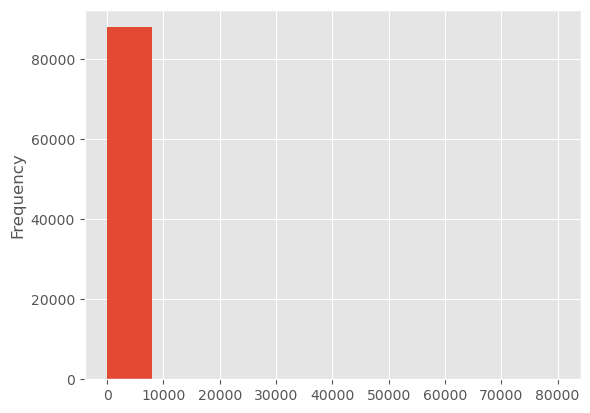

In [42]:
filtered_listings.price.plot.hist() # histogram


In [43]:
filtered_listings['lnprice'] = np.log(filtered_listings.price)
filtered_listings.lnprice.describe().apply(lambda x: f"{x:5.5f}")

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    87946.00000
mean            -inf
std              nan
min             -inf
25%          4.14313
50%          4.70048
75%          5.26269
max         11.29103
Name: lnprice, dtype: object

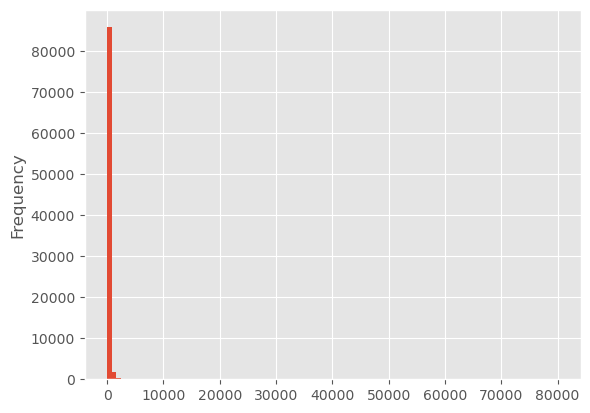

In [44]:
filtered_listings.price.plot.hist(bins=100);

/tmp/ipykernel_186998/1545710727.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(filtered_listings["price"])
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


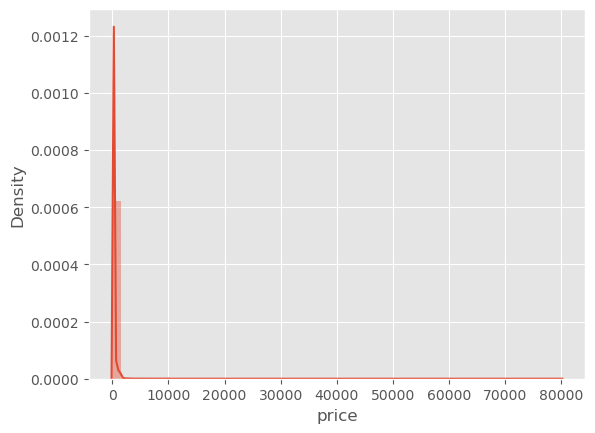

In [45]:
sb.distplot(filtered_listings["price"])
plt.show()

/opt/conda/lib/python3.11/site-packages/numpy/core/function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
/opt/conda/lib/python3.11/site-packages/numpy/core/function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start
/opt/conda/lib/python3.11/site-packages/numpy/lib/function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


ValueError: array must not contain infs or NaNs

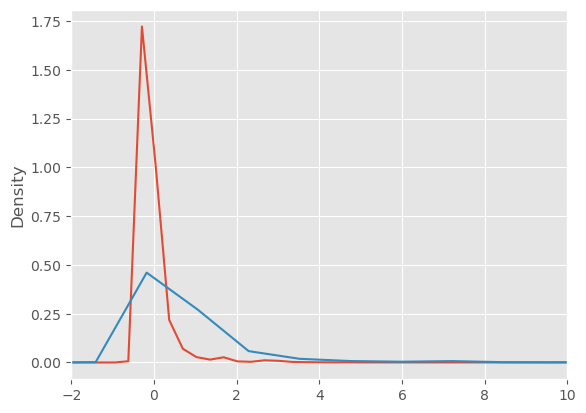

In [46]:
filtered_listings.z.plot.kde(xlim=[-2, 10])
filtered_listings.iqs.plot.kde(xlim=[-2, 10])
filtered_listings.lnprice.plot.kde();

<function matplotlib.pyplot.show(close=None, block=None)>

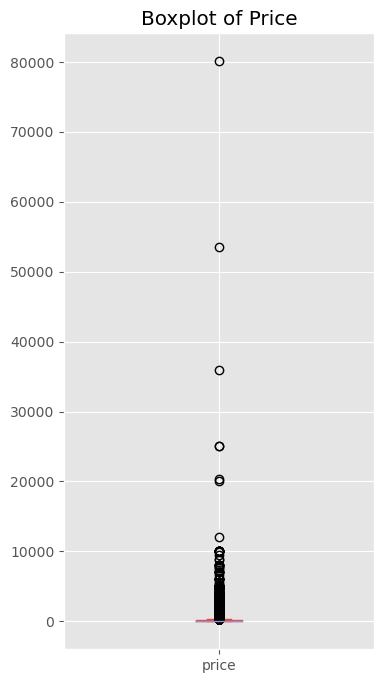

In [56]:
filtered_listings.price.plot.box(figsize=(4, 8)); # boxplot
plt.title('Boxplot of Price')
plt.savefig('Price_BoxPlot.jpg', dpi=300,bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

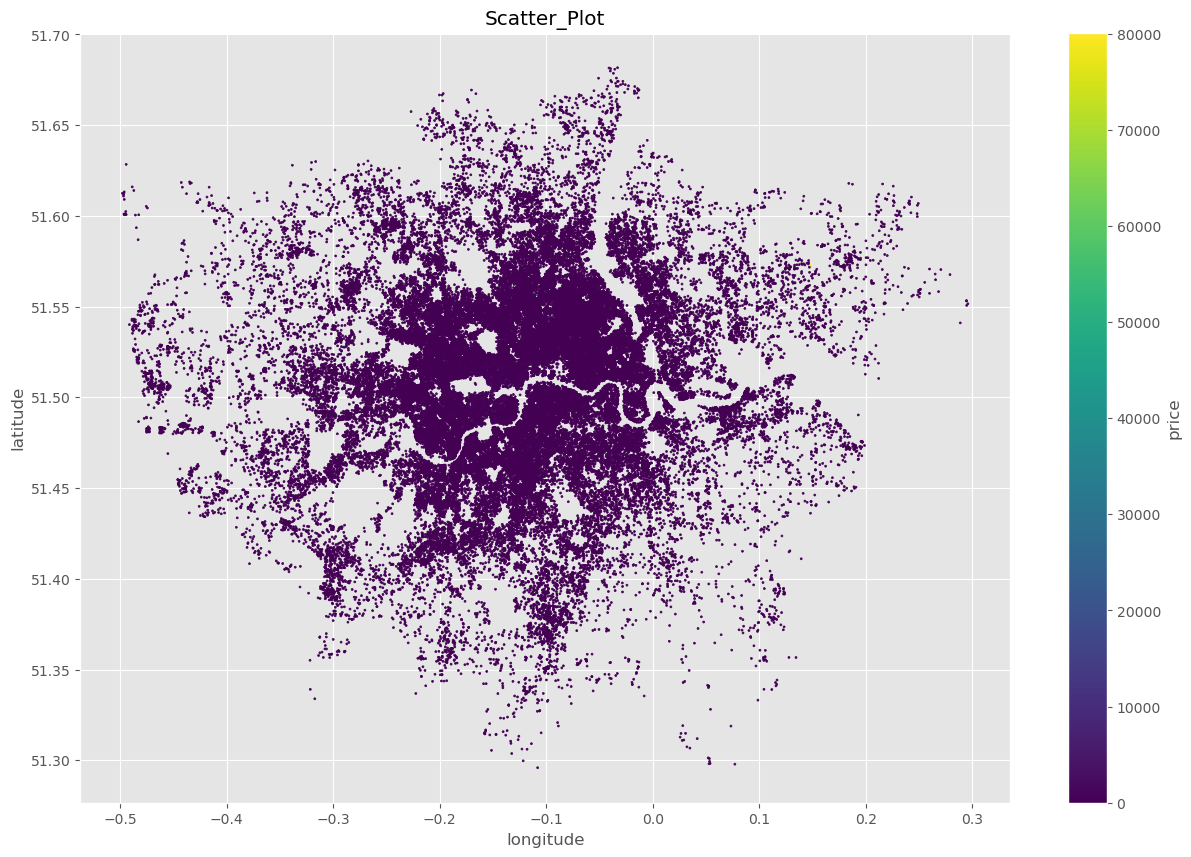

In [57]:
filtered_listings.plot.scatter(x='longitude', y='latitude', c='price', s=2, cmap='viridis', figsize=(15,10))
plt.title('Scatter_Plot')
plt.savefig('scatter_plot_price.jpg', dpi=300,bbox_inches='tight')
plt.show

<Axes: xlabel='longitude', ylabel='latitude'>

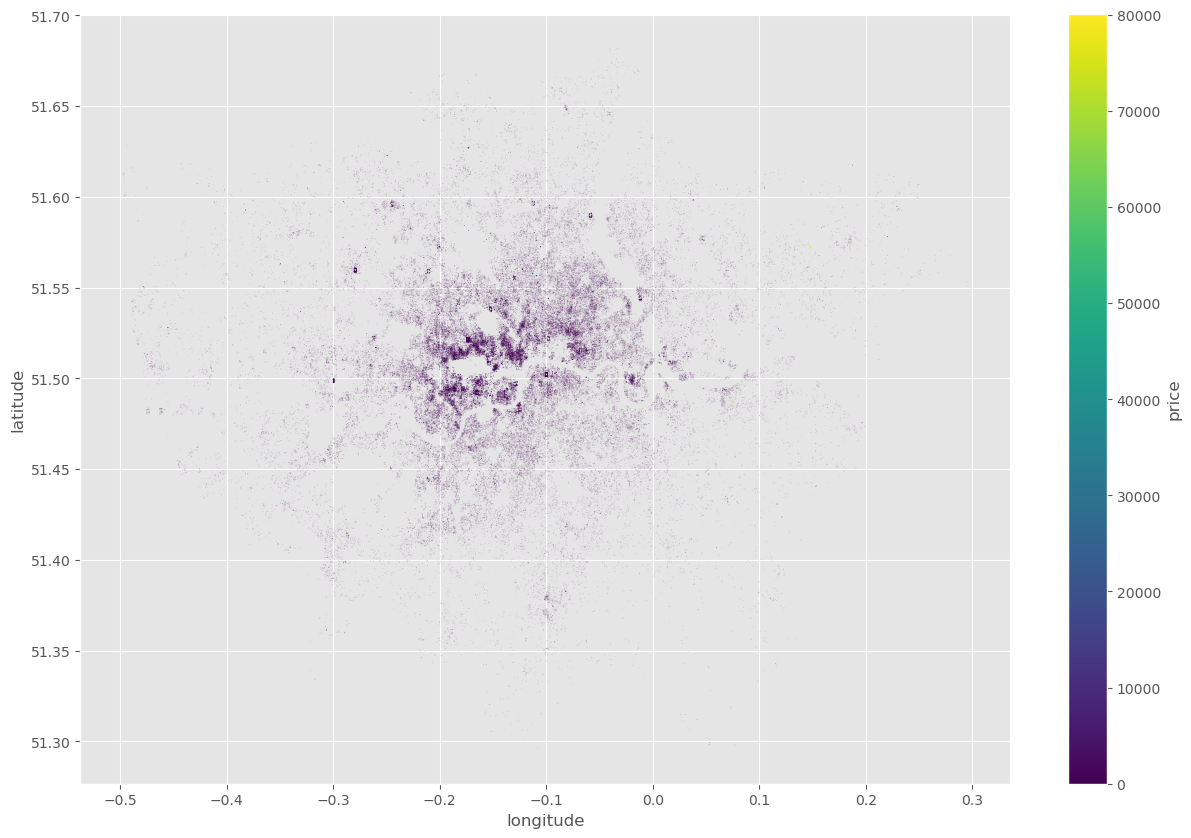

In [52]:
filtered_listings.plot.scatter(x='longitude', y='latitude', c='price', s=(filtered_listings.price/filtered_listings.price.max()), cmap='viridis', figsize=(15,10))

In [54]:
filtered_listings.dtypes

id                                         int64
description                               object
neighborhood_overview                     object
host_since                        datetime64[ns]
host_identity_verified                    object
neighbourhood_cleansed                    object
latitude                                 float64
longitude                                float64
property_type                           category
room_type                               category
accommodates                               int64
bedrooms                                  UInt16
beds                                      UInt16
amenities                                 object
price                                    float64
minimum_nights                             int64
maximum_nights                             int64
minimum_nights_avg_ntm                   float64
maximum_nights_avg_ntm                   float64
has_availability                          object
calculated_host_list

In [59]:
print(filtered_listings['neighbourhood_cleansed'].unique())

['Wandsworth' 'Hammersmith and Fulham' 'Islington'
 'Kensington and Chelsea' 'Greenwich' 'Westminster' 'Tower Hamlets'
 'Barnet' 'Lewisham' 'Brent' 'Lambeth' 'Richmond upon Thames' 'Haringey'
 'Southwark' 'Enfield' 'Hounslow' 'Camden' 'Waltham Forest'
 'City of London' 'Hackney' 'Ealing' 'Croydon' 'Merton' 'Havering'
 'Harrow' 'Newham' 'Hillingdon' 'Barking and Dagenham' 'Bromley'
 'Kingston upon Thames' 'Redbridge' 'Bexley' 'Sutton']


**Count of Airbnb Listings in the neighbourhood**

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


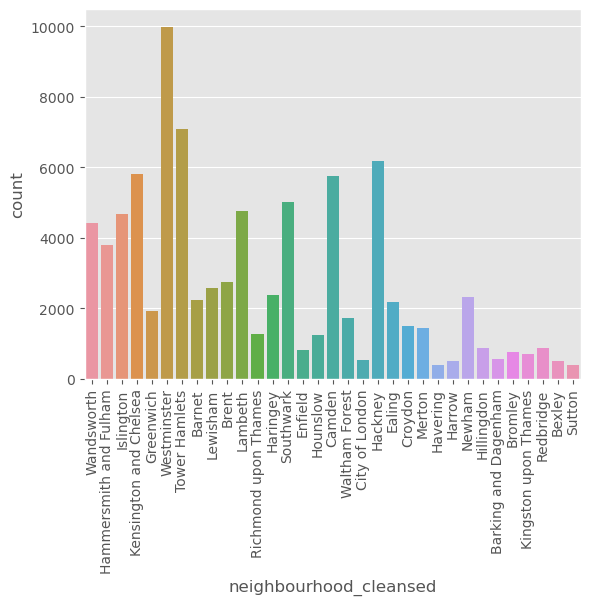

In [68]:
sb.countplot(data=filtered_listings, x='neighbourhood_cleansed')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.savefig('Count_of_Airbnb_Listings.jpg', dpi=300,bbox_inches='tight')
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


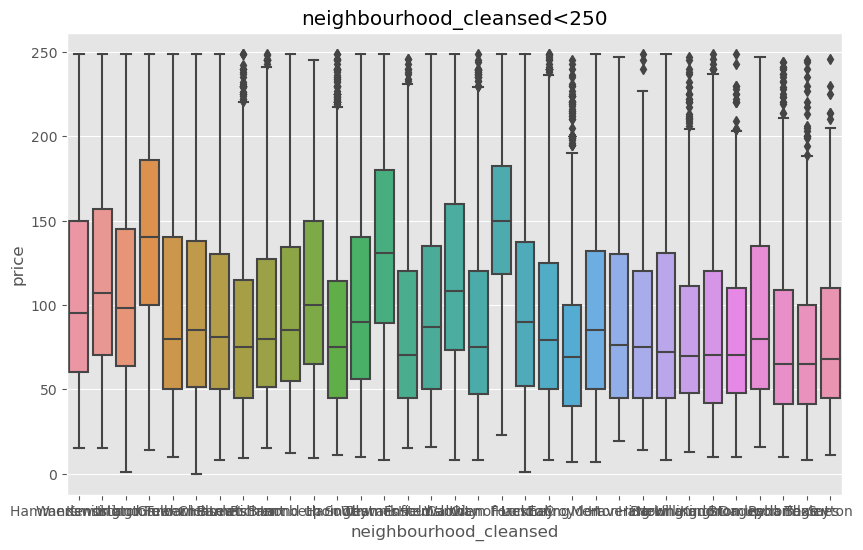

In [73]:
df1=filtered_listings[filtered_listings.price<250]
plt.figure(figsize=(10,6))
sb.boxplot(x='neighbourhood_cleansed',
           y ='price',
           data=df1)
plt.title("neighbourhood_cleansed<250")
plt.show()

##Reading the Housing data of London

In [ ]:
housing_london_data=pd.read_csv('HousingLondonFiltered.csv',low_memory=False)

In [ ]:
housing_london_data

In [ ]:
housing_london_data.info(verbose=True)